# Context
Ridesharing is a service that arranges transportation on short notice. It is a very volatile market and its demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.



# Objective
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas with over 110 million users worldwide. As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting actionable insights from data that will help in the growth of the business.



# Key Questions
1 - What are the different variables that influence the number of pickups?

2 - Which factor affects the number of pickups the most?

3 - What could be the possible reasons for that?

4 - What are your recommendations to Uber management to capitalize on fluctuating demand?


# Guidelines
Perform univariate analysis on the data to better understand the variables at your disposal
Perform bivariate analysis to better understand the correlation between different variables
Create visualizations to explore data and extract the insights
Create a presentation for Uber Management, detailing all the insights along with supporting data.


# Data
The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

- pickup_dt: Date and time of the pick-up.
- borough: NYC's borough.
- pickups: Number of pickups for the period (hourly).
- spd: Wind speed in miles/hour.
- vsb: Visibility in miles to the nearest tenth.
- temp: Temperature in Fahrenheit.
- dewp: Dew point in Fahrenheit.
- slp: Sea level pressure.
- pcp01: 1-hour liquid precipitation.
- pcp06: 6-hour liquid precipitation.
- pcp24: 24-hour liquid precipitation.
- sd: Snow depth in inches.
- hday: Being a holiday (Y) or not (N).

In [1]:
# Mount Drive from G drive
from google.colab import files
uploaded = files.upload()

Saving Uber_Data.csv to Uber_Data.csv


In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import io

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Commands to help with graph displays
%matplotlib inline

#To display values upto 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [3]:
# Get the dataset
df = pd.read_csv("Uber_Data.csv")

#Data Overview Process
The initial steps to get an overview of any dataset is to:

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not get information about the number of rows and columns in the dataset

- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [4]:
#First view of data
df.head(10)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
1,01-01-2015 01:00,Brooklyn,1519,5.00,10.00,NaN,7.00,1023.50,0.00,0.00,0.00,0.00,Y
2,01-01-2015 01:00,EWR,0,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
3,01-01-2015 01:00,Manhattan,5258,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
4,01-01-2015 01:00,Queens,405,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
5,01-01-2015 01:00,Staten Island,6,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
6,01-01-2015 01:00,NaN,4,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
7,01-01-2015 02:00,Bronx,120,3.00,10.00,30.00,6.00,1023.00,0.00,0.00,0.00,0.00,Y
8,01-01-2015 02:00,Brooklyn,1229,3.00,10.00,NaN,6.00,1023.00,0.00,0.00,0.00,0.00,Y
9,01-01-2015 02:00,EWR,0,3.00,10.00,30.00,6.00,1023.00,0.00,0.00,0.00,0.00,Y


In [5]:
df.shape

(29101, 13)

#Insight
- Dataset has 13 columns with 29101 rows of data. Small- mid sized dataset

In [6]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.00,29101.00,29101.00,28742.00,29101.00,29101.00,29101.00,29101.00,29101.00,29101.00
mean,490.22,5.98,8.82,47.90,30.82,1017.82,0.00,0.03,0.09,2.53
std,995.65,3.70,2.44,19.80,21.28,7.77,0.02,0.09,0.22,4.52
min,0.00,0.00,0.00,2.00,-16.00,991.40,0.00,0.00,0.00,0.00
25%,1.00,3.00,9.10,32.00,14.00,1012.50,0.00,0.00,0.00,0.00
50%,54.00,6.00,10.00,46.50,30.00,1018.20,0.00,0.00,0.00,0.00
75%,449.00,8.00,10.00,65.00,50.00,1022.90,0.00,0.00,0.05,2.96
max,7883.00,21.00,10.00,89.00,73.00,1043.40,0.28,1.24,2.10,19.00


In [7]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pickup_dt,29101,4343,01-01-2015 01:00,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.00,NaN,NaN,NaN,490.22,995.65,0.00,1.00,54.00,449.00,7883.00
spd,29101.00,NaN,NaN,NaN,5.98,3.70,0.00,3.00,6.00,8.00,21.00
vsb,29101.00,NaN,NaN,NaN,8.82,2.44,0.00,9.10,10.00,10.00,10.00
temp,28742.00,NaN,NaN,NaN,47.90,19.80,2.00,32.00,46.50,65.00,89.00
dewp,29101.00,NaN,NaN,NaN,30.82,21.28,-16.00,14.00,30.00,50.00,73.00
slp,29101.00,NaN,NaN,NaN,1017.82,7.77,991.40,1012.50,1018.20,1022.90,1043.40
pcp01,29101.00,NaN,NaN,NaN,0.00,0.02,0.00,0.00,0.00,0.00,0.28
pcp06,29101.00,NaN,NaN,NaN,0.03,0.09,0.00,0.00,0.00,0.00,1.24


#Insight

- 6 unique boroughs - Bronx in the most common
- Pickups, mean is larger than the median. distribution is skewed to the right  
- Remaining numeric columns have similiar means and medians.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


#Insight

- pickup_dt should be a datetime data types not an object
- Borough & Temp columns are missing data


In [9]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [10]:
df.duplicated().sum()

0

#Insight

- Borough missing 3043 rows of data

- Temp missing 359 rows


Further analysis of the data and the domain knowledge will help understand how to handle the missing data.  

- No duplicates found

-----------------------------------------------------------

# Missing value treatment
One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

- Replacing with mean: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.

- Replacing with median: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

- Replacing with mode: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

In [11]:
#Check the missing values for borough in %
df.borough.value_counts(normalize=True, dropna=False)

borough
Bronx           0.15
Brooklyn        0.15
EWR             0.15
Manhattan       0.15
Queens          0.15
Staten Island   0.15
NaN             0.10
Name: proportion, dtype: float64

#Insight

- All 6 categories have the same percentage missing of 15%
- There is no mode / multiple modes for the 6 categories
- NaN is 10%, which is close to the percentage of observations from the other boroughs
- We can treat the missing values as a separate category

In [12]:
#Convert missing values to unknown category
df['borough'].fillna('Unkown', inplace = True)

In [13]:
#Check boroughs
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unkown'], dtype=object)

In [14]:
#Check missing values for boroughs
df.isnull().sum()

pickup_dt      0
borough        0
pickups        0
spd            0
vsb            0
temp         359
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
dtype: int64

#Insight

The missing values in the borough column have been treated. Let us now move on to temp variable and see how to deal with the missing values present there

In [15]:
#Check temp missing values
df.loc[df['temp'].isnull()==True]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
1,01-01-2015 01:00,Brooklyn,1519,5.00,10.00,NaN,7.00,1023.50,0.00,0.00,0.00,0.00,Y
8,01-01-2015 02:00,Brooklyn,1229,3.00,10.00,NaN,6.00,1023.00,0.00,0.00,0.00,0.00,Y
15,01-01-2015 03:00,Brooklyn,1601,5.00,10.00,NaN,8.00,1022.30,0.00,0.00,0.00,0.00,Y
22,01-01-2015 04:00,Brooklyn,1390,5.00,10.00,NaN,9.00,1022.00,0.00,0.00,0.00,0.00,Y
29,01-01-2015 05:00,Brooklyn,759,5.00,10.00,NaN,9.00,1021.80,0.00,0.00,0.00,0.00,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,15-01-2015 19:00,Brooklyn,594,5.00,10.00,NaN,13.00,1016.20,0.00,0.00,0.00,0.00,N
2340,15-01-2015 20:00,Brooklyn,620,5.00,10.00,NaN,13.00,1015.50,0.00,0.00,0.00,0.00,N
2347,15-01-2015 21:00,Brooklyn,607,3.00,10.00,NaN,14.00,1015.40,0.00,0.00,0.00,0.00,N
2354,15-01-2015 22:00,Brooklyn,648,9.00,10.00,NaN,14.00,1015.40,0.00,0.00,0.00,0.00,N


#Insight

- Brooklyn seems to have the missing values

- change column to datetime and review which months have the missing values for the 359 rows

In [16]:
#Filter borough with missing temp
df.loc[df['temp'].isnull()==True, 'borough'].value_counts()

borough
Brooklyn    359
Name: count, dtype: int64

In [17]:
# Change pickup_dt to datetime frame
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d-%m-%Y %H:%M")

In [18]:
#Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    29101 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [19]:
# Extracting date parts from pickup date
df['start_year'] = df.pickup_dt.dt.year # extracting the year from the date
df['start_month'] = df.pickup_dt.dt.month_name() # extracting the month name from the date
df['start_hour'] = df.pickup_dt.dt.hour # extracting the hour from the time
df['start_day'] = df.pickup_dt.dt.day # extracting the day from the date
df['week_day'] = df.pickup_dt.dt.day_name() # extracting the day of the week from the date

In [20]:
# removing the pickup date column
df.drop('pickup_dt',axis=1,inplace=True)

In [21]:
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,Bronx,152,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.00,10.00,NaN,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
2,EWR,0,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
4,Queens,405,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday


In [22]:
#Which temp data is missing from month
df.loc[df['temp'].isnull()==True,'start_month'].value_counts()

start_month
January    359
Name: count, dtype: int64

#Insight

- The missing values in temp are from Brooklyn with 359 missing values for the month of January only.

In [23]:
#Identify which days of January are missing values for temp
df.loc[df['temp'].isnull()==True,'start_day'].unique() # days for which missing values are present

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int32)

It can be observed that out of the 31 days in January, the data is missing for the first 15 days.

Since from the statistical summary, the mean and median values of temperature are close to each other, hence we can impute the missing values in the temp column by taking the mean tempertaure of the Brooklyn borough during 16th to 31st January.

We will use fillna() function to impute the missing values.

fillna() - The fillna() function is used to fill NaN values by using the provided input value.

   Syntax of fillna():  data['column'].fillna(value = x)

In [24]:
#impute mean values for temp
df['temp'] = df['temp'].fillna(value=df.loc[df['borough'] == 'Brooklyn','temp'].mean())

In [26]:
#Check misisng values
df.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

All missing data has been handled and we can start the EDA process.

-------------------------------------------------

#**Exploratory Data Analysis**

**Univariate Analysis
Let us first explore the numerical variables.**

Univariate data visualization plots help us comprehend the descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

We can check the distribution of observations by plotting Histograms and Boxplots


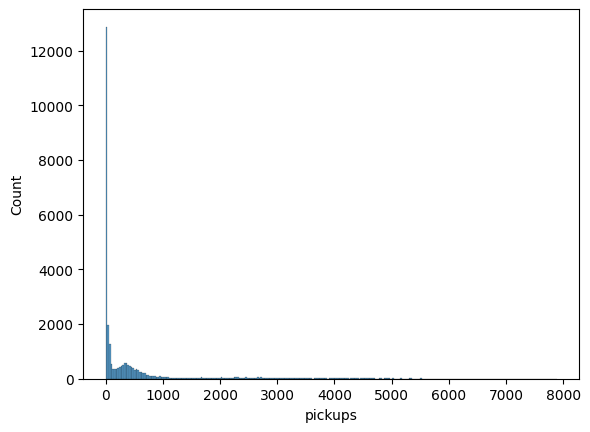

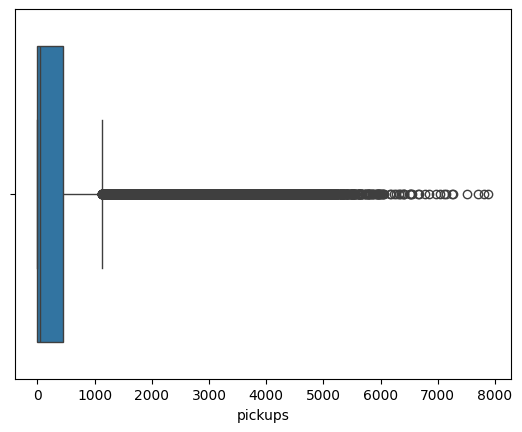

In [28]:
#Obervations of Pickups
sns.histplot(data=df, x = 'pickups')
plt.show()
sns.boxplot(data = df, x = 'pickups')
plt.show()

- The distribution of pickups is highly right skewed
- There are a lot of outliers in this variable
- While mostly the number of pickups are at a lower end, we have observations where the number of pickups went as high as 8000